In [1]:
# import python libraries for data handling
import pandas as pd
import numpy as np

# libraries for data visualisation
import matplotlib.pyplot as plt
import seaborn as sns

# libraries for preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_curve

# libraries for classification
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense

from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import AUC
from tensorflow.keras.metrics import BinaryAccuracy
from tensorflow.keras.metrics import Precision, Recall
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

C:\ProgramData\Anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
!pip install scikit-learn

Defaulting to user installation because normal site-packages is not writeable
  Using cached numpy-1.22.4-cp39-cp39-win_amd64.whl (14.7 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.26.2
    Uninstalling numpy-1.26.2:
      Successfully uninstalled numpy-1.26.2


  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'C:\\Users\\RAZER STEALTH\\AppData\\Roaming\\Python\\Python39\\site-packages\\~34py.libs\\libopenblas64__v0.3.23-293-gc2f4bdbb-gcc_10_3_0-2bde3a66a51006b2b53eb373ff767a3f.dll'
Check the permissions.



In [3]:
!pip install tensorflow

Defaulting to user installation because normal site-packages is not writeable

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
daal4py 2021.5.0 requires daal==2021.4.0, which is not installed.
scipy 1.7.3 requires numpy<1.23.0,>=1.16.5, but you have numpy 1.26.2 which is incompatible.
numba 0.55.1 requires numpy<1.22,>=1.18, but you have numpy 1.26.2 which is incompatible.



  Using cached numpy-1.26.2-cp39-cp39-win_amd64.whl (15.8 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.22.4
    Uninstalling numpy-1.22.4:
      Successfully uninstalled numpy-1.22.4


In [4]:
# read data
df = pd.read_csv('GDS3257_real_data.csv')

In [5]:
df.head(10)

,ID_REF,IDENTIFIER,GSM254629,GSM254648,GSM254694,GSM254701,GSM254728,GSM254726,GSM254639,GSM254652,...,GSM254689,GSM254706,GSM254712,GSM254713,GSM254683,GSM254710,GSM254725,GSM254651,GSM254638,GSM254685
0,1007_s_at,MIR4640,10.98850,10.69190,10.89780,11.74940,10.90280,10.76880,10.51630,10.93800,...,10.23520,10.17000,10.19930,10.15010,10.18260,10.33990,10.19360,10.21810,10.57670,10.18410
1,1053_at,RFC2,6.82603,6.90960,6.80295,6.81802,6.83816,6.74044,6.86373,6.83467,...,6.60734,6.66148,6.48863,6.76097,6.79454,6.91376,7.00858,6.71859,6.62177,6.62687
2,117_at,HSPA6,7.77559,7.68374,7.88498,7.93840,8.01043,8.15948,8.06989,8.06285,...,7.61063,10.34790,7.87939,8.57729,7.88463,8.28737,8.14476,9.05960,7.71877,7.79599
3,121_at,PAX8,9.85506,10.13210,9.84110,9.90026,9.87185,9.79065,9.89498,9.80940,...,9.67324,9.93771,9.91081,9.83901,9.83206,9.70648,10.10700,9.86705,10.09310,9.70015
4,1255_g_at,GUCA1A,4.82396,4.98489,4.87689,4.70904,4.78877,4.60932,4.77661,4.94879,...,4.88691,4.87439,4.92326,4.73456,4.65881,4.88611,4.94876,4.95341,5.05479,4.91616
5,1294_at,MIR5193,9.10430,8.99562,9.26155,9.68563,9.03172,8.86510,9.20549,8.58132,...,8.94531,8.82514,8.68856,9.20812,9.02868,9.13011,9.30555,9.11727,9.00076,8.87875
6,1316_at,THRA,6.19335,6.31397,6.25660,6.18930,6.30964,6.21697,7.00306,6.26334,...,6.12790,6.18747,6.49116,6.72320,5.99694,6.01230,6.44827,6.24238,6.49048,6.11221
7,1320_at,PTPN21,6.11913,6.02121,6.07582,6.00636,6.01719,5.86234,5.83225,6.09981,...,6.62600,6.35755,6.30883,6.25203,6.29047,6.00880,6.05265,6.41734,6.05866,6.24525
8,1405_i_at,CCL5,7.75290,8.14121,7.44056,7.86048,8.23439,8.48797,8.68532,8.45587,...,8.72658,8.35606,8.03414,7.38256,8.08762,8.64576,8.66743,7.78426,8.59067,8.48760
9,1431_at,CYP2E1,4.96849,5.13706,4.91496,4.87536,4.86365,4.86261,5.25705,4.91590,...,4.88332,4.83131,5.00290,5.00028,4.78520,4.79873,5.21664,5.01650,4.89434,5.22272


In [6]:
# data exploration
print(df.shape)

(22480, 109)


In [7]:
# to check the first thre columns
print(df.columns[0:3])

Index(['ID_REF', 'IDENTIFIER', 'GSM254629'], dtype='object')


In [8]:
# to check the last column
print(df.columns[-1])

GSM254685


In [9]:
# to check for missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22480 entries, 0 to 22479
Columns: 109 entries, ID_REF to GSM254685
dtypes: float64(107), object(2)
memory usage: 18.7+ MB


In [10]:
missing_values = df.isnull().sum()
print(len(missing_values))

109


In [11]:
non_missing_values = df.notnull() 
print(non_missing_values)

       ID_REF  IDENTIFIER  GSM254629  GSM254648  GSM254694  GSM254701  \
0        True        True       True       True       True       True   
1        True        True       True       True       True       True   
2        True        True       True       True       True       True   
3        True        True       True       True       True       True   
4        True        True       True       True       True       True   
...       ...         ...        ...        ...        ...        ...   
22475    True        True       True       True       True       True   
22476    True        True       True       True       True       True   
22477    True        True       True       True       True       True   
22478    True        True       True       True       True       True   
22479    True        True       True       True       True       True   

       GSM254728  GSM254726  GSM254639  GSM254652  ...  GSM254689  GSM254706  \
0           True       True       True     

In [12]:
df['IDENTIFIER'].count()

22480

In [13]:
control_values = df[df['IDENTIFIER'] == '#NAME?']
control_count = control_values.shape[0]
print(control_values)

                ID_REF IDENTIFIER  GSM254629  GSM254648  GSM254694  GSM254701  \
22215   AFFX-BioB-3_at     #NAME?    6.28837    7.01144    6.70970    7.09844   
22216   AFFX-BioB-5_at     #NAME?    6.96869    7.18804    7.13880    7.66196   
22217   AFFX-BioB-M_at     #NAME?    7.90574    8.48658    8.06760    8.70416   
22218   AFFX-BioC-3_at     #NAME?    8.15116    8.52709    8.64861    9.61614   
22219   AFFX-BioC-5_at     #NAME?    8.44546    8.98322    9.00924    9.59099   
...                ...        ...        ...        ...        ...        ...   
22475   AFFX-ThrX-5_at     #NAME?    5.15120    5.28124    5.30015    5.34466   
22476   AFFX-ThrX-M_at     #NAME?    4.58001    4.68364    4.60809    4.68117   
22477  AFFX-TrpnX-3_at     #NAME?    4.06666    4.04274    4.11669    4.13300   
22478  AFFX-TrpnX-5_at     #NAME?    4.63296    4.67585    4.76781    4.82604   
22479  AFFX-TrpnX-M_at     #NAME?    4.63396    4.52340    4.55376    4.73988   

       GSM254728  GSM254726

In [14]:
df.head(10)

,ID_REF,IDENTIFIER,GSM254629,GSM254648,GSM254694,GSM254701,GSM254728,GSM254726,GSM254639,GSM254652,...,GSM254689,GSM254706,GSM254712,GSM254713,GSM254683,GSM254710,GSM254725,GSM254651,GSM254638,GSM254685
0,1007_s_at,MIR4640,10.98850,10.69190,10.89780,11.74940,10.90280,10.76880,10.51630,10.93800,...,10.23520,10.17000,10.19930,10.15010,10.18260,10.33990,10.19360,10.21810,10.57670,10.18410
1,1053_at,RFC2,6.82603,6.90960,6.80295,6.81802,6.83816,6.74044,6.86373,6.83467,...,6.60734,6.66148,6.48863,6.76097,6.79454,6.91376,7.00858,6.71859,6.62177,6.62687
2,117_at,HSPA6,7.77559,7.68374,7.88498,7.93840,8.01043,8.15948,8.06989,8.06285,...,7.61063,10.34790,7.87939,8.57729,7.88463,8.28737,8.14476,9.05960,7.71877,7.79599
3,121_at,PAX8,9.85506,10.13210,9.84110,9.90026,9.87185,9.79065,9.89498,9.80940,...,9.67324,9.93771,9.91081,9.83901,9.83206,9.70648,10.10700,9.86705,10.09310,9.70015
4,1255_g_at,GUCA1A,4.82396,4.98489,4.87689,4.70904,4.78877,4.60932,4.77661,4.94879,...,4.88691,4.87439,4.92326,4.73456,4.65881,4.88611,4.94876,4.95341,5.05479,4.91616
5,1294_at,MIR5193,9.10430,8.99562,9.26155,9.68563,9.03172,8.86510,9.20549,8.58132,...,8.94531,8.82514,8.68856,9.20812,9.02868,9.13011,9.30555,9.11727,9.00076,8.87875
6,1316_at,THRA,6.19335,6.31397,6.25660,6.18930,6.30964,6.21697,7.00306,6.26334,...,6.12790,6.18747,6.49116,6.72320,5.99694,6.01230,6.44827,6.24238,6.49048,6.11221
7,1320_at,PTPN21,6.11913,6.02121,6.07582,6.00636,6.01719,5.86234,5.83225,6.09981,...,6.62600,6.35755,6.30883,6.25203,6.29047,6.00880,6.05265,6.41734,6.05866,6.24525
8,1405_i_at,CCL5,7.75290,8.14121,7.44056,7.86048,8.23439,8.48797,8.68532,8.45587,...,8.72658,8.35606,8.03414,7.38256,8.08762,8.64576,8.66743,7.78426,8.59067,8.48760
9,1431_at,CYP2E1,4.96849,5.13706,4.91496,4.87536,4.86365,4.86261,5.25705,4.91590,...,4.88332,4.83131,5.00290,5.00028,4.78520,4.79873,5.21664,5.01650,4.89434,5.22272


In [15]:
# to transpose the dataframe by making the column the rows and the rows the column
df_new = df.transpose()

In [16]:
df_new.head(10)

,0,1,2,3,4,5,6,7,8,9,...,22470,22471,22472,22473,22474,22475,22476,22477,22478,22479
ID_REF,1007_s_at,1053_at,117_at,121_at,1255_g_at,1294_at,1316_at,1320_at,1405_i_at,1431_at,...,AFFX-r2-Hs28SrRNA-5_at,AFFX-r2-Hs28SrRNA-M_at,AFFX-r2-P1-cre-3_at,AFFX-r2-P1-cre-5_at,AFFX-ThrX-3_at,AFFX-ThrX-5_at,AFFX-ThrX-M_at,AFFX-TrpnX-3_at,AFFX-TrpnX-5_at,AFFX-TrpnX-M_at
IDENTIFIER,MIR4640,RFC2,HSPA6,PAX8,GUCA1A,MIR5193,THRA,PTPN21,CCL5,CYP2E1,...,#NAME?,#NAME?,#NAME?,#NAME?,#NAME?,#NAME?,#NAME?,#NAME?,#NAME?,#NAME?
GSM254629,10.9885,6.82603,7.77559,9.85506,4.82396,9.1043,6.19335,6.11913,7.7529,4.96849,...,4.99415,5.4294,12.6988,13.0276,5.4709,5.1512,4.58001,4.06666,4.63296,4.63396
GSM254648,10.6919,6.9096,7.68374,10.1321,4.98489,8.99562,6.31397,6.02121,8.14121,5.13706,...,6.15485,7.64748,13.219,13.3432,5.49011,5.28124,4.68364,4.04274,4.67585,4.5234
GSM254694,10.8978,6.80295,7.88498,9.8411,4.87689,9.26155,6.2566,6.07582,7.44056,4.91496,...,5.21648,5.93094,12.9839,12.9199,5.44948,5.30015,4.60809,4.11669,4.76781,4.55376
GSM254701,11.7494,6.81802,7.9384,9.90026,4.70904,9.68563,6.1893,6.00636,7.86048,4.87536,...,5.0627,5.87969,13.3904,13.351,5.39581,5.34466,4.68117,4.133,4.82604,4.73988
GSM254728,10.9028,6.83816,8.01043,9.87185,4.78877,9.03172,6.30964,6.01719,8.23439,4.86365,...,4.99501,5.71502,12.8339,12.8981,5.2557,5.07107,4.46944,4.09605,4.62491,4.62771
GSM254726,10.7688,6.74044,8.15948,9.79065,4.60932,8.8651,6.21697,5.86234,8.48797,4.86261,...,5.6389,5.931,13.0779,13.0362,5.22249,5.12596,4.40579,4.05294,4.64793,4.37654
GSM254639,10.5163,6.86373,8.06989,9.89498,4.77661,9.20549,7.00306,5.83225,8.68532,5.25705,...,5.23865,6.07179,13.2936,13.3586,5.58771,5.446,4.85555,4.39684,5.05352,5.09032
GSM254652,10.938,6.83467,8.06285,9.8094,4.94879,8.58132,6.26334,6.09981,8.45587,4.9159,...,5.09373,5.98257,12.7709,12.8201,5.48378,5.25102,4.53531,4.08345,4.64413,4.61662


In [17]:
df_new.shape

(109, 22480)

In [18]:
# read metadata
metadata = pd.read_csv('metadata_cleaned.csv')

In [19]:
metadata.head(10)

,Unnamed: 0,DISEASE_STATUS
0,ID_REF,DISEASE_STATUS
1,IDENTIFIER,DISEASE_STATUS
2,GSM254629,Adenocarcinoma of the Lung
3,GSM254648,Adenocarcinoma of the Lung
4,GSM254694,Adenocarcinoma of the Lung
5,GSM254701,Adenocarcinoma of the Lung
6,GSM254728,Adenocarcinoma of the Lung
7,GSM254726,Adenocarcinoma of the Lung
8,GSM254639,Adenocarcinoma of the Lung
9,GSM254652,Adenocarcinoma of the Lung


In [20]:
df_new['Disease_Status'] = metadata['DISEASE_STATUS']

In [21]:
df_new.head(15)

,0,1,2,3,4,5,6,7,8,9,...,22471,22472,22473,22474,22475,22476,22477,22478,22479,Disease_Status
ID_REF,1007_s_at,1053_at,117_at,121_at,1255_g_at,1294_at,1316_at,1320_at,1405_i_at,1431_at,...,AFFX-r2-Hs28SrRNA-M_at,AFFX-r2-P1-cre-3_at,AFFX-r2-P1-cre-5_at,AFFX-ThrX-3_at,AFFX-ThrX-5_at,AFFX-ThrX-M_at,AFFX-TrpnX-3_at,AFFX-TrpnX-5_at,AFFX-TrpnX-M_at,NaN
IDENTIFIER,MIR4640,RFC2,HSPA6,PAX8,GUCA1A,MIR5193,THRA,PTPN21,CCL5,CYP2E1,...,#NAME?,#NAME?,#NAME?,#NAME?,#NAME?,#NAME?,#NAME?,#NAME?,#NAME?,NaN
GSM254629,10.9885,6.82603,7.77559,9.85506,4.82396,9.1043,6.19335,6.11913,7.7529,4.96849,...,5.4294,12.6988,13.0276,5.4709,5.1512,4.58001,4.06666,4.63296,4.63396,NaN
GSM254648,10.6919,6.9096,7.68374,10.1321,4.98489,8.99562,6.31397,6.02121,8.14121,5.13706,...,7.64748,13.219,13.3432,5.49011,5.28124,4.68364,4.04274,4.67585,4.5234,NaN
GSM254694,10.8978,6.80295,7.88498,9.8411,4.87689,9.26155,6.2566,6.07582,7.44056,4.91496,...,5.93094,12.9839,12.9199,5.44948,5.30015,4.60809,4.11669,4.76781,4.55376,NaN
GSM254701,11.7494,6.81802,7.9384,9.90026,4.70904,9.68563,6.1893,6.00636,7.86048,4.87536,...,5.87969,13.3904,13.351,5.39581,5.34466,4.68117,4.133,4.82604,4.73988,NaN
GSM254728,10.9028,6.83816,8.01043,9.87185,4.78877,9.03172,6.30964,6.01719,8.23439,4.86365,...,5.71502,12.8339,12.8981,5.2557,5.07107,4.46944,4.09605,4.62491,4.62771,NaN
GSM254726,10.7688,6.74044,8.15948,9.79065,4.60932,8.8651,6.21697,5.86234,8.48797,4.86261,...,5.931,13.0779,13.0362,5.22249,5.12596,4.40579,4.05294,4.64793,4.37654,NaN
GSM254639,10.5163,6.86373,8.06989,9.89498,4.77661,9.20549,7.00306,5.83225,8.68532,5.25705,...,6.07179,13.2936,13.3586,5.58771,5.446,4.85555,4.39684,5.05352,5.09032,NaN
GSM254652,10.938,6.83467,8.06285,9.8094,4.94879,8.58132,6.26334,6.09981,8.45587,4.9159,...,5.98257,12.7709,12.8201,5.48378,5.25102,4.53531,4.08345,4.64413,4.61662,NaN


In [22]:
df_newr = df_new
df_newr.head(10)

,0,1,2,3,4,5,6,7,8,9,...,22471,22472,22473,22474,22475,22476,22477,22478,22479,Disease_Status
ID_REF,1007_s_at,1053_at,117_at,121_at,1255_g_at,1294_at,1316_at,1320_at,1405_i_at,1431_at,...,AFFX-r2-Hs28SrRNA-M_at,AFFX-r2-P1-cre-3_at,AFFX-r2-P1-cre-5_at,AFFX-ThrX-3_at,AFFX-ThrX-5_at,AFFX-ThrX-M_at,AFFX-TrpnX-3_at,AFFX-TrpnX-5_at,AFFX-TrpnX-M_at,NaN
IDENTIFIER,MIR4640,RFC2,HSPA6,PAX8,GUCA1A,MIR5193,THRA,PTPN21,CCL5,CYP2E1,...,#NAME?,#NAME?,#NAME?,#NAME?,#NAME?,#NAME?,#NAME?,#NAME?,#NAME?,NaN
GSM254629,10.9885,6.82603,7.77559,9.85506,4.82396,9.1043,6.19335,6.11913,7.7529,4.96849,...,5.4294,12.6988,13.0276,5.4709,5.1512,4.58001,4.06666,4.63296,4.63396,NaN
GSM254648,10.6919,6.9096,7.68374,10.1321,4.98489,8.99562,6.31397,6.02121,8.14121,5.13706,...,7.64748,13.219,13.3432,5.49011,5.28124,4.68364,4.04274,4.67585,4.5234,NaN
GSM254694,10.8978,6.80295,7.88498,9.8411,4.87689,9.26155,6.2566,6.07582,7.44056,4.91496,...,5.93094,12.9839,12.9199,5.44948,5.30015,4.60809,4.11669,4.76781,4.55376,NaN
GSM254701,11.7494,6.81802,7.9384,9.90026,4.70904,9.68563,6.1893,6.00636,7.86048,4.87536,...,5.87969,13.3904,13.351,5.39581,5.34466,4.68117,4.133,4.82604,4.73988,NaN
GSM254728,10.9028,6.83816,8.01043,9.87185,4.78877,9.03172,6.30964,6.01719,8.23439,4.86365,...,5.71502,12.8339,12.8981,5.2557,5.07107,4.46944,4.09605,4.62491,4.62771,NaN
GSM254726,10.7688,6.74044,8.15948,9.79065,4.60932,8.8651,6.21697,5.86234,8.48797,4.86261,...,5.931,13.0779,13.0362,5.22249,5.12596,4.40579,4.05294,4.64793,4.37654,NaN
GSM254639,10.5163,6.86373,8.06989,9.89498,4.77661,9.20549,7.00306,5.83225,8.68532,5.25705,...,6.07179,13.2936,13.3586,5.58771,5.446,4.85555,4.39684,5.05352,5.09032,NaN
GSM254652,10.938,6.83467,8.06285,9.8094,4.94879,8.58132,6.26334,6.09981,8.45587,4.9159,...,5.98257,12.7709,12.8201,5.48378,5.25102,4.53531,4.08345,4.64413,4.61662,NaN


In [23]:
metadatar = metadata

In [24]:
if metadatar.index.equals(df_newr.index):
    metadatar['DISEASE_STATUS'] = df_newr['DISEASE_STATUS']
else:
        print("indices do not match. Pease align the indices first")

indices do not match. Pease align the indices first


In [25]:
#print(metadatar.index)
metadatar = metadatar.rename(columns={'Unnamed: 0': 'SAMPLE'})
metadatar.head(10)

,SAMPLE,DISEASE_STATUS
0,ID_REF,DISEASE_STATUS
1,IDENTIFIER,DISEASE_STATUS
2,GSM254629,Adenocarcinoma of the Lung
3,GSM254648,Adenocarcinoma of the Lung
4,GSM254694,Adenocarcinoma of the Lung
5,GSM254701,Adenocarcinoma of the Lung
6,GSM254728,Adenocarcinoma of the Lung
7,GSM254726,Adenocarcinoma of the Lung
8,GSM254639,Adenocarcinoma of the Lung
9,GSM254652,Adenocarcinoma of the Lung


In [26]:
print(df_newr.index)

Index(['ID_REF', 'IDENTIFIER', 'GSM254629', 'GSM254648', 'GSM254694',
       'GSM254701', 'GSM254728', 'GSM254726', 'GSM254639', 'GSM254652',
       ...
       'GSM254689', 'GSM254706', 'GSM254712', 'GSM254713', 'GSM254683',
       'GSM254710', 'GSM254725', 'GSM254651', 'GSM254638', 'GSM254685'],
      dtype='object', length=109)


In [27]:
column_names = metadatar.columns
print(column_names)

Index(['SAMPLE', 'DISEASE_STATUS'], dtype='object')


In [28]:
df_reset = df_newr.reset_index(drop=False)
df_reset.head(10)

,index,0,1,2,3,4,5,6,7,8,...,22471,22472,22473,22474,22475,22476,22477,22478,22479,Disease_Status
0,ID_REF,1007_s_at,1053_at,117_at,121_at,1255_g_at,1294_at,1316_at,1320_at,1405_i_at,...,AFFX-r2-Hs28SrRNA-M_at,AFFX-r2-P1-cre-3_at,AFFX-r2-P1-cre-5_at,AFFX-ThrX-3_at,AFFX-ThrX-5_at,AFFX-ThrX-M_at,AFFX-TrpnX-3_at,AFFX-TrpnX-5_at,AFFX-TrpnX-M_at,NaN
1,IDENTIFIER,MIR4640,RFC2,HSPA6,PAX8,GUCA1A,MIR5193,THRA,PTPN21,CCL5,...,#NAME?,#NAME?,#NAME?,#NAME?,#NAME?,#NAME?,#NAME?,#NAME?,#NAME?,NaN
2,GSM254629,10.9885,6.82603,7.77559,9.85506,4.82396,9.1043,6.19335,6.11913,7.7529,...,5.4294,12.6988,13.0276,5.4709,5.1512,4.58001,4.06666,4.63296,4.63396,NaN
3,GSM254648,10.6919,6.9096,7.68374,10.1321,4.98489,8.99562,6.31397,6.02121,8.14121,...,7.64748,13.219,13.3432,5.49011,5.28124,4.68364,4.04274,4.67585,4.5234,NaN
4,GSM254694,10.8978,6.80295,7.88498,9.8411,4.87689,9.26155,6.2566,6.07582,7.44056,...,5.93094,12.9839,12.9199,5.44948,5.30015,4.60809,4.11669,4.76781,4.55376,NaN
5,GSM254701,11.7494,6.81802,7.9384,9.90026,4.70904,9.68563,6.1893,6.00636,7.86048,...,5.87969,13.3904,13.351,5.39581,5.34466,4.68117,4.133,4.82604,4.73988,NaN
6,GSM254728,10.9028,6.83816,8.01043,9.87185,4.78877,9.03172,6.30964,6.01719,8.23439,...,5.71502,12.8339,12.8981,5.2557,5.07107,4.46944,4.09605,4.62491,4.62771,NaN
7,GSM254726,10.7688,6.74044,8.15948,9.79065,4.60932,8.8651,6.21697,5.86234,8.48797,...,5.931,13.0779,13.0362,5.22249,5.12596,4.40579,4.05294,4.64793,4.37654,NaN
8,GSM254639,10.5163,6.86373,8.06989,9.89498,4.77661,9.20549,7.00306,5.83225,8.68532,...,6.07179,13.2936,13.3586,5.58771,5.446,4.85555,4.39684,5.05352,5.09032,NaN
9,GSM254652,10.938,6.83467,8.06285,9.8094,4.94879,8.58132,6.26334,6.09981,8.45587,...,5.98257,12.7709,12.8201,5.48378,5.25102,4.53531,4.08345,4.64413,4.61662,NaN


In [29]:
df_reset['Disease_Status'] = metadata['DISEASE_STATUS']
df_reset.head(10)

,index,0,1,2,3,4,5,6,7,8,...,22471,22472,22473,22474,22475,22476,22477,22478,22479,Disease_Status
0,ID_REF,1007_s_at,1053_at,117_at,121_at,1255_g_at,1294_at,1316_at,1320_at,1405_i_at,...,AFFX-r2-Hs28SrRNA-M_at,AFFX-r2-P1-cre-3_at,AFFX-r2-P1-cre-5_at,AFFX-ThrX-3_at,AFFX-ThrX-5_at,AFFX-ThrX-M_at,AFFX-TrpnX-3_at,AFFX-TrpnX-5_at,AFFX-TrpnX-M_at,DISEASE_STATUS
1,IDENTIFIER,MIR4640,RFC2,HSPA6,PAX8,GUCA1A,MIR5193,THRA,PTPN21,CCL5,...,#NAME?,#NAME?,#NAME?,#NAME?,#NAME?,#NAME?,#NAME?,#NAME?,#NAME?,DISEASE_STATUS
2,GSM254629,10.9885,6.82603,7.77559,9.85506,4.82396,9.1043,6.19335,6.11913,7.7529,...,5.4294,12.6988,13.0276,5.4709,5.1512,4.58001,4.06666,4.63296,4.63396,Adenocarcinoma of the Lung
3,GSM254648,10.6919,6.9096,7.68374,10.1321,4.98489,8.99562,6.31397,6.02121,8.14121,...,7.64748,13.219,13.3432,5.49011,5.28124,4.68364,4.04274,4.67585,4.5234,Adenocarcinoma of the Lung
4,GSM254694,10.8978,6.80295,7.88498,9.8411,4.87689,9.26155,6.2566,6.07582,7.44056,...,5.93094,12.9839,12.9199,5.44948,5.30015,4.60809,4.11669,4.76781,4.55376,Adenocarcinoma of the Lung
5,GSM254701,11.7494,6.81802,7.9384,9.90026,4.70904,9.68563,6.1893,6.00636,7.86048,...,5.87969,13.3904,13.351,5.39581,5.34466,4.68117,4.133,4.82604,4.73988,Adenocarcinoma of the Lung
6,GSM254728,10.9028,6.83816,8.01043,9.87185,4.78877,9.03172,6.30964,6.01719,8.23439,...,5.71502,12.8339,12.8981,5.2557,5.07107,4.46944,4.09605,4.62491,4.62771,Adenocarcinoma of the Lung
7,GSM254726,10.7688,6.74044,8.15948,9.79065,4.60932,8.8651,6.21697,5.86234,8.48797,...,5.931,13.0779,13.0362,5.22249,5.12596,4.40579,4.05294,4.64793,4.37654,Adenocarcinoma of the Lung
8,GSM254639,10.5163,6.86373,8.06989,9.89498,4.77661,9.20549,7.00306,5.83225,8.68532,...,6.07179,13.2936,13.3586,5.58771,5.446,4.85555,4.39684,5.05352,5.09032,Adenocarcinoma of the Lung
9,GSM254652,10.938,6.83467,8.06285,9.8094,4.94879,8.58132,6.26334,6.09981,8.45587,...,5.98257,12.7709,12.8201,5.48378,5.25102,4.53531,4.08345,4.64413,4.61662,Adenocarcinoma of the Lung


In [30]:
final_df = df_reset
final_df.head(10)

,index,0,1,2,3,4,5,6,7,8,...,22471,22472,22473,22474,22475,22476,22477,22478,22479,Disease_Status
0,ID_REF,1007_s_at,1053_at,117_at,121_at,1255_g_at,1294_at,1316_at,1320_at,1405_i_at,...,AFFX-r2-Hs28SrRNA-M_at,AFFX-r2-P1-cre-3_at,AFFX-r2-P1-cre-5_at,AFFX-ThrX-3_at,AFFX-ThrX-5_at,AFFX-ThrX-M_at,AFFX-TrpnX-3_at,AFFX-TrpnX-5_at,AFFX-TrpnX-M_at,DISEASE_STATUS
1,IDENTIFIER,MIR4640,RFC2,HSPA6,PAX8,GUCA1A,MIR5193,THRA,PTPN21,CCL5,...,#NAME?,#NAME?,#NAME?,#NAME?,#NAME?,#NAME?,#NAME?,#NAME?,#NAME?,DISEASE_STATUS
2,GSM254629,10.9885,6.82603,7.77559,9.85506,4.82396,9.1043,6.19335,6.11913,7.7529,...,5.4294,12.6988,13.0276,5.4709,5.1512,4.58001,4.06666,4.63296,4.63396,Adenocarcinoma of the Lung
3,GSM254648,10.6919,6.9096,7.68374,10.1321,4.98489,8.99562,6.31397,6.02121,8.14121,...,7.64748,13.219,13.3432,5.49011,5.28124,4.68364,4.04274,4.67585,4.5234,Adenocarcinoma of the Lung
4,GSM254694,10.8978,6.80295,7.88498,9.8411,4.87689,9.26155,6.2566,6.07582,7.44056,...,5.93094,12.9839,12.9199,5.44948,5.30015,4.60809,4.11669,4.76781,4.55376,Adenocarcinoma of the Lung
5,GSM254701,11.7494,6.81802,7.9384,9.90026,4.70904,9.68563,6.1893,6.00636,7.86048,...,5.87969,13.3904,13.351,5.39581,5.34466,4.68117,4.133,4.82604,4.73988,Adenocarcinoma of the Lung
6,GSM254728,10.9028,6.83816,8.01043,9.87185,4.78877,9.03172,6.30964,6.01719,8.23439,...,5.71502,12.8339,12.8981,5.2557,5.07107,4.46944,4.09605,4.62491,4.62771,Adenocarcinoma of the Lung
7,GSM254726,10.7688,6.74044,8.15948,9.79065,4.60932,8.8651,6.21697,5.86234,8.48797,...,5.931,13.0779,13.0362,5.22249,5.12596,4.40579,4.05294,4.64793,4.37654,Adenocarcinoma of the Lung
8,GSM254639,10.5163,6.86373,8.06989,9.89498,4.77661,9.20549,7.00306,5.83225,8.68532,...,6.07179,13.2936,13.3586,5.58771,5.446,4.85555,4.39684,5.05352,5.09032,Adenocarcinoma of the Lung
9,GSM254652,10.938,6.83467,8.06285,9.8094,4.94879,8.58132,6.26334,6.09981,8.45587,...,5.98257,12.7709,12.8201,5.48378,5.25102,4.53531,4.08345,4.64413,4.61662,Adenocarcinoma of the Lung


In [31]:
# to chaeck the last column # the disease status column is the class
final_df.columns[-1]

'Disease_Status'

In [32]:
print(final_df['Disease_Status'].value_counts())

Adenocarcinoma of the Lung    58
Normal Lung Tissue            49
DISEASE_STATUS                 2
Name: Disease_Status, dtype: int64


In [33]:
final_df.loc[0:1, 'Disease_Status'] = 'NA'  # change DISEASE_STATUS to not applicable because the first two values 
                                             # are not samples but id_ref and identifier
final_df.head(5)                                           

,index,0,1,2,3,4,5,6,7,8,...,22471,22472,22473,22474,22475,22476,22477,22478,22479,Disease_Status
0,ID_REF,1007_s_at,1053_at,117_at,121_at,1255_g_at,1294_at,1316_at,1320_at,1405_i_at,...,AFFX-r2-Hs28SrRNA-M_at,AFFX-r2-P1-cre-3_at,AFFX-r2-P1-cre-5_at,AFFX-ThrX-3_at,AFFX-ThrX-5_at,AFFX-ThrX-M_at,AFFX-TrpnX-3_at,AFFX-TrpnX-5_at,AFFX-TrpnX-M_at,NA
1,IDENTIFIER,MIR4640,RFC2,HSPA6,PAX8,GUCA1A,MIR5193,THRA,PTPN21,CCL5,...,#NAME?,#NAME?,#NAME?,#NAME?,#NAME?,#NAME?,#NAME?,#NAME?,#NAME?,NA
2,GSM254629,10.9885,6.82603,7.77559,9.85506,4.82396,9.1043,6.19335,6.11913,7.7529,...,5.4294,12.6988,13.0276,5.4709,5.1512,4.58001,4.06666,4.63296,4.63396,Adenocarcinoma of the Lung
3,GSM254648,10.6919,6.9096,7.68374,10.1321,4.98489,8.99562,6.31397,6.02121,8.14121,...,7.64748,13.219,13.3432,5.49011,5.28124,4.68364,4.04274,4.67585,4.5234,Adenocarcinoma of the Lung
4,GSM254694,10.8978,6.80295,7.88498,9.8411,4.87689,9.26155,6.2566,6.07582,7.44056,...,5.93094,12.9839,12.9199,5.44948,5.30015,4.60809,4.11669,4.76781,4.55376,Adenocarcinoma of the Lung


In [34]:
#final_df.dropna(inplace=True)

In [35]:
print(final_df['Disease_Status'].value_counts())

Adenocarcinoma of the Lung    58
Normal Lung Tissue            49
NA                             2
Name: Disease_Status, dtype: int64


In [36]:
# CLASS - Disease_Status column. two classes: Adenocarcinoma of the Lung & Normal Lung Tissue 
# FEATURES - Readsof each sample for the different gene expression Identifier 
# OBSERVATION - Samples e.g GSM254629. Total of 109 samples

In [37]:
# DATA PREPROCESSING - to separate the features and the class
# Extract features (from the third row to the end) and the class
features = final_df.iloc[2:-1, :-1]  # Features from row 3 to the second-to-last row, excluding the last column
class_labels = final_df.iloc[2:-1, -1]  # Class labels from row 3 to the second-to-last row in the last column

In [38]:
print(class_labels)

2      Adenocarcinoma of the Lung
3      Adenocarcinoma of the Lung
4      Adenocarcinoma of the Lung
5      Adenocarcinoma of the Lung
6      Adenocarcinoma of the Lung
                  ...            
103           Normal Lung Tissue 
104           Normal Lung Tissue 
105           Normal Lung Tissue 
106           Normal Lung Tissue 
107           Normal Lung Tissue 
Name: Disease_Status, Length: 106, dtype: object


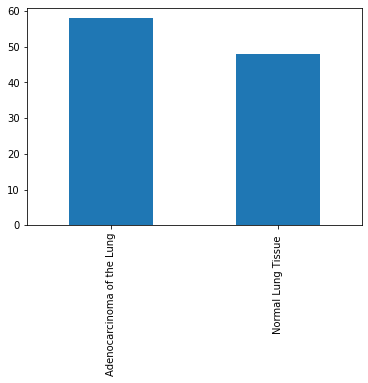

In [39]:
class_labels.value_counts().plot(kind='bar')
plt.show()

In [40]:
print(features)

         index        0        1        2        3        4        5        6  \
2    GSM254629  10.9885  6.82603  7.77559  9.85506  4.82396   9.1043  6.19335   
3    GSM254648  10.6919   6.9096  7.68374  10.1321  4.98489  8.99562  6.31397   
4    GSM254694  10.8978  6.80295  7.88498   9.8411  4.87689  9.26155   6.2566   
5    GSM254701  11.7494  6.81802   7.9384  9.90026  4.70904  9.68563   6.1893   
6    GSM254728  10.9028  6.83816  8.01043  9.87185  4.78877  9.03172  6.30964   
..         ...      ...      ...      ...      ...      ...      ...      ...   
103  GSM254683  10.1826  6.79454  7.88463  9.83206  4.65881  9.02868  5.99694   
104  GSM254710  10.3399  6.91376  8.28737  9.70648  4.88611  9.13011   6.0123   
105  GSM254725  10.1936  7.00858  8.14476   10.107  4.94876  9.30555  6.44827   
106  GSM254651  10.2181  6.71859   9.0596  9.86705  4.95341  9.11727  6.24238   
107  GSM254638  10.5767  6.62177  7.71877  10.0931  5.05479  9.00076  6.49048   

           7        8  ... 

In [41]:
# to encode the target labels i.e the class labels with values 0 and 1 because it is only 2 classes
#create label encoder
label_encoder = LabelEncoder()

# Fit the encoder on the class la bels and transform them into numerical values
encoded_labels = label_encoder.fit_transform(class_labels)

# to check for the number of classes
classes = np.unique(class_labels)
nclasses = np.unique(class_labels).shape[0]

In [42]:
print(classes)

['Adenocarcinoma of the Lung' 'Normal Lung Tissue ']


In [43]:
print(nclasses)

2


In [44]:
print(encoded_labels)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


In [45]:
print(len(encoded_labels))

106


In [46]:
classes[0]

'Adenocarcinoma of the Lung'

In [47]:
classes[1]

'Normal Lung Tissue '

In [48]:
features.head(5)

,index,0,1,2,3,4,5,6,7,8,...,22470,22471,22472,22473,22474,22475,22476,22477,22478,22479
2,GSM254629,10.9885,6.82603,7.77559,9.85506,4.82396,9.1043,6.19335,6.11913,7.7529,...,4.99415,5.4294,12.6988,13.0276,5.4709,5.1512,4.58001,4.06666,4.63296,4.63396
3,GSM254648,10.6919,6.9096,7.68374,10.1321,4.98489,8.99562,6.31397,6.02121,8.14121,...,6.15485,7.64748,13.219,13.3432,5.49011,5.28124,4.68364,4.04274,4.67585,4.5234
4,GSM254694,10.8978,6.80295,7.88498,9.8411,4.87689,9.26155,6.2566,6.07582,7.44056,...,5.21648,5.93094,12.9839,12.9199,5.44948,5.30015,4.60809,4.11669,4.76781,4.55376
5,GSM254701,11.7494,6.81802,7.9384,9.90026,4.70904,9.68563,6.1893,6.00636,7.86048,...,5.0627,5.87969,13.3904,13.351,5.39581,5.34466,4.68117,4.133,4.82604,4.73988
6,GSM254728,10.9028,6.83816,8.01043,9.87185,4.78877,9.03172,6.30964,6.01719,8.23439,...,4.99501,5.71502,12.8339,12.8981,5.2557,5.07107,4.46944,4.09605,4.62491,4.62771


In [49]:
print(features.index)

RangeIndex(start=2, stop=108, step=1)


In [50]:
features.set_index('index', inplace=True)
print(features.index)

Index(['GSM254629', 'GSM254648', 'GSM254694', 'GSM254701', 'GSM254728',
       'GSM254726', 'GSM254639', 'GSM254652', 'GSM254700', 'GSM254625',
       ...
       'GSM254679', 'GSM254689', 'GSM254706', 'GSM254712', 'GSM254713',
       'GSM254683', 'GSM254710', 'GSM254725', 'GSM254651', 'GSM254638'],
      dtype='object', name='index', length=106)


In [51]:
# Data  Normalisation - scale data between 0 and 1
min_max_scaler = MinMaxScaler()
features = min_max_scaler.fit_transform(features)

In [52]:
print(features)

[[0.65706125 0.35279029 0.15138049 ... 0.17365009 0.34234623 0.30102321]
 [0.53247081 0.41583867 0.12107866 ... 0.1188518  0.40846308 0.17173595]
 [0.61896161 0.33537786 0.18746887 ... 0.28826373 0.55022352 0.2072385 ]
 ...
 [0.32315383 0.49051294 0.27317175 ... 0.03303475 0.39485124 0.56038122]
 [0.33344535 0.27173347 0.5749826  ... 0.15901125 0.59753353 0.21058294]
 [0.48407964 0.19868879 0.13263525 ... 0.20643284 0.4239556  0.31488043]]


In [53]:
# split the data into train, validation and test
x = features
y = encoded_labels

# split the data into train and test
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2)

# split the data into train and validation
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size = 0.2)

In [54]:
x_train.shape

(67, 22480)

In [55]:
x_test.shape

(22, 22480)

In [56]:
x_val.shape

(17, 22480)

In [57]:
type(x_train)

numpy.ndarray

In [58]:
# to view the first ten samples of the train set
x_train[0:10, 0:10]

array([[0.43258002, 0.26657312, 0.13892655, 0.21944158, 0.31452449,
        0.64395297, 0.36645685, 0.34082494, 0.52965351, 0.31566314],
       [0.32689238, 0.22468672, 0.32169096, 0.41135793, 0.62897403,
        0.25517238, 0.48347699, 0.17951147, 0.68740446, 0.28463658],
       [0.50583886, 0.89916182, 0.2170614 , 0.37107508, 0.47030018,
        0.24576295, 0.29402561, 0.22657558, 0.76587636, 0.40203711],
       [0.43925901, 0.28549442, 0.27168387, 0.24162423, 0.        ,
        0.8270969 , 0.18619685, 0.40130314, 0.7246166 , 0.28360787],
       [0.65365874, 0.45670658, 0.32235078, 0.37888587, 0.46731459,
        0.41784589, 0.24113944, 0.23450731, 0.81504215, 0.19233163],
       [0.4499706 , 0.86856936, 0.20398394, 0.88304642, 0.44581579,
        0.65615994, 0.4291692 , 0.23503354, 0.91976595, 0.63090717],
       [0.54742502, 0.37583082, 0.14027257, 0.66424011, 0.64922362,
        0.40221782, 0.62041772, 0.13232297, 0.61875449, 0.4284662 ],
       [0.38141645, 0.30925167, 0.0951876

In [59]:
# to build the model
# define model
model = Sequential()

# hidden layer 1
model.add(Dense(64, input_dim = x_train.shape[1], activation = 'relu'))

# hidden layer 2
model.add(Dense(32, activation = 'relu'))

# output layer
model.add(Dense(1, activation = 'sigmoid'))

# define optimiser and learning rate. Adam optimiser is used 
opt_adam = keras.optimizers.Adam(learning_rate = 0.001)

model.compile(loss = tf.keras.losses.BinaryCrossentropy(),
              optimizer = opt_adam, metrics =[keras.metrics.BinaryAccuracy()])

In [60]:
# fit model and define the history. history keeps record of the process
history = model.fit(x_train, y_train, validation_data = (x_val, y_val), batch_size = 24, epochs = 190, verbose = 1)

Epoch 1/190
3/3 [==============================] - 1s 128ms/step - loss: 2.6371 - binary_accuracy: 0.5373 - val_loss: 1.2619 - val_binary_accuracy: 0.6471
Epoch 2/190
3/3 [==============================] - 0s 32ms/step - loss: 1.1936 - binary_accuracy: 0.3731 - val_loss: 0.5630 - val_binary_accuracy: 0.4706
Epoch 3/190
3/3 [==============================] - 0s 33ms/step - loss: 0.3211 - binary_accuracy: 0.8806 - val_loss: 0.2022 - val_binary_accuracy: 1.0000
Epoch 4/190
3/3 [==============================] - 0s 33ms/step - loss: 0.1582 - binary_accuracy: 0.9701 - val_loss: 0.2106 - val_binary_accuracy: 0.8824
Epoch 5/190
3/3 [==============================] - 0s 33ms/step - loss: 0.1078 - binary_accuracy: 0.9851 - val_loss: 0.0971 - val_binary_accuracy: 1.0000
Epoch 6/190
3/3 [==============================] - 0s 31ms/step - loss: 0.0988 - binary_accuracy: 0.9701 - val_loss: 0.0606 - val_binary_accuracy: 1.0000
Epoch 7/190
3/3 [==============================] - 0s 36ms/step - loss: 0.0

In [61]:
predictions = model.predict(x_test)
accuracy = model.evaluate(x_test, y_test, verbose = 0)

1/1 [==============================] - 0s 102ms/step


In [62]:
print(predictions)

[[3.5336801e-05]
 [9.9999011e-01]
 [9.9937809e-01]
 [2.9690801e-07]
 [2.2865967e-04]
 [2.5355741e-01]
 [1.0311556e-05]
 [9.9997026e-01]
 [1.3924257e-06]
 [9.9995017e-01]
 [2.6327530e-07]
 [3.2391225e-07]
 [9.9998099e-01]
 [9.9999177e-01]
 [2.0743416e-01]
 [9.6530785e-05]
 [9.9998569e-01]
 [9.9990326e-01]
 [6.6321896e-08]
 [9.9990416e-01]
 [6.2034458e-09]
 [9.9327320e-01]]


In [63]:
print(accuracy)

[0.07330513745546341, 0.9545454382896423]


In [64]:
# to get the first 20 predictions of the test set
for index,entry in enumerate(predictions[0:50, :]):
    print('predicted probability: %.4f, actual: %d' % (entry[0], y_test[index]))

predicted probability: 0.0000, actual: 0
predicted probability: 1.0000, actual: 1
predicted probability: 0.9994, actual: 1
predicted probability: 0.0000, actual: 0
predicted probability: 0.0002, actual: 0
predicted probability: 0.2536, actual: 1
predicted probability: 0.0000, actual: 0
predicted probability: 1.0000, actual: 1
predicted probability: 0.0000, actual: 0
predicted probability: 1.0000, actual: 1
predicted probability: 0.0000, actual: 0
predicted probability: 0.0000, actual: 0
predicted probability: 1.0000, actual: 1
predicted probability: 1.0000, actual: 1
predicted probability: 0.2074, actual: 0
predicted probability: 0.0001, actual: 0
predicted probability: 1.0000, actual: 1
predicted probability: 0.9999, actual: 1
predicted probability: 0.0000, actual: 0
predicted probability: 0.9999, actual: 1
predicted probability: 0.0000, actual: 0
predicted probability: 0.9933, actual: 1


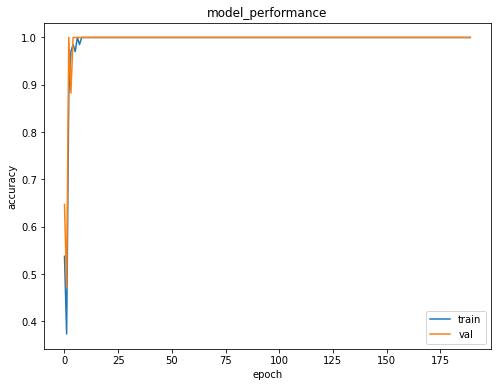

In [65]:
# summarise history for accuracy
plt.figure(figsize=(8,6))
plt.plot(history.history['binary_accuracy'])
plt.plot(history.history['val_binary_accuracy'])
plt.title('model_performance')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc = 'lower right')
plt.show()

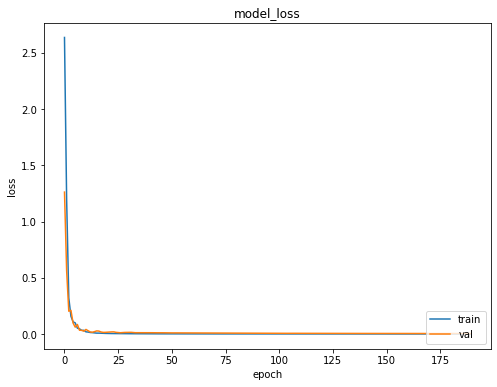

In [66]:
# summarise history for loss
plt.figure(figsize=(8,6))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model_loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc = 'lower right')
plt.show()

In [67]:
# 0 - Adenocarcinoma of the lung     1 - Normal lung tissue
# Set a threshold for classification
threshold = 0.5

# Convert predicted probabilities to predicted classes
predicted_classes = (predictions >= threshold).astype(int)

# Print the results
for index, (entry, actual, pred_class) in enumerate(zip(predictions[0:50, :], y_test, predicted_classes[0:50, :]), start=1):
    prob = entry[0]
    print(f"Sample {index}: Predicted Probability: {prob:.4f}, Actual: {actual}, Predicted Class: {pred_class}")

Sample 1: Predicted Probability: 0.0000, Actual: 0, Predicted Class: [0]
Sample 2: Predicted Probability: 1.0000, Actual: 1, Predicted Class: [1]
Sample 3: Predicted Probability: 0.9994, Actual: 1, Predicted Class: [1]
Sample 4: Predicted Probability: 0.0000, Actual: 0, Predicted Class: [0]
Sample 5: Predicted Probability: 0.0002, Actual: 0, Predicted Class: [0]
Sample 6: Predicted Probability: 0.2536, Actual: 1, Predicted Class: [0]
Sample 7: Predicted Probability: 0.0000, Actual: 0, Predicted Class: [0]
Sample 8: Predicted Probability: 1.0000, Actual: 1, Predicted Class: [1]
Sample 9: Predicted Probability: 0.0000, Actual: 0, Predicted Class: [0]
Sample 10: Predicted Probability: 1.0000, Actual: 1, Predicted Class: [1]
Sample 11: Predicted Probability: 0.0000, Actual: 0, Predicted Class: [0]
Sample 12: Predicted Probability: 0.0000, Actual: 0, Predicted Class: [0]
Sample 13: Predicted Probability: 1.0000, Actual: 1, Predicted Class: [1]
Sample 14: Predicted Probability: 1.0000, Actua

In [68]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                1438784   
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 1440897 (5.50 MB)
Trainable params: 1440897 (5.50 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


1/1 [==============================] - 0s 51ms/step - loss: 0.0733 - binary_accuracy: 0.9545


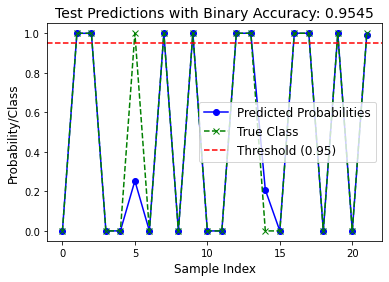

In [86]:
# Evaluate the model on the test data
_, binary_accuracy = model.evaluate(x_test, y_test)

# Plot the predicted probabilities as a line plot
plt.plot(predictions, label='Predicted Probabilities', marker='o', linestyle='-', color='blue')
plt.plot(y_test, label='True Class', marker='x', linestyle='--', color='green')
plt.axhline(y=threshold, color='red', linestyle='--', label=f'Threshold ({threshold})')

plt.title(f'Test Predictions with Binary Accuracy: {binary_accuracy:.4f}',fontsize=14)
plt.xlabel('Sample Index',fontsize=12)
plt.ylabel('Probability/Class',fontsize=12)
plt.legend(fontsize=12)
plt.show()

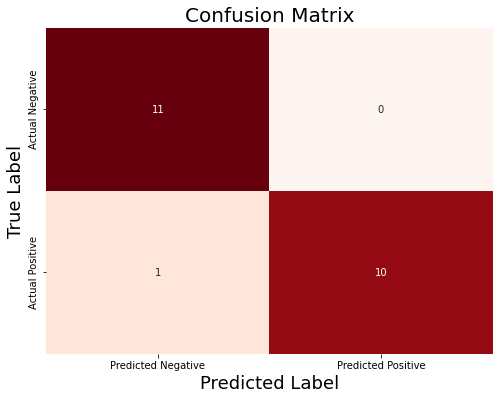

In [85]:
# To Convert probabilities to binary predictions using a threshold
threshold = 0.95
binary_predictions = (predictions >= threshold).astype(int)

# To Calculate the confusion matrix
conf_matrix = confusion_matrix(y_test, binary_predictions)

# To Plot the confusion matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap= sns.color_palette("Reds", as_cmap=True), cbar=False,
            xticklabels=['Predicted Negative', 'Predicted Positive'],
            yticklabels=['Actual Negative', 'Actual Positive'])
plt.title('Confusion Matrix',fontsize=20)
plt.xlabel('Predicted Label',fontsize=18)
plt.ylabel('True Label',fontsize=18)
plt.show()

In [71]:
print(x_test)

[[1.         0.22660299 0.37151001 ... 0.38161783 0.37490365 0.15967959]
 [0.36226161 0.28437785 0.18352319 ... 0.05186594 0.40761523 0.26908729]
 [0.29223725 0.37801115 0.13375693 ... 0.14551786 0.36560814 0.35499035]
 ...
 [0.4371587  0.20332858 0.21270664 ... 0.1821035  0.51547711 0.29776063]
 [0.84923969 1.         0.13230535 ... 0.3955694  0.63309696 0.46540373]
 [0.39006973 0.30262016 0.25156293 ... 0.62988248 0.67148142 0.48051219]]


In [72]:
print(y_val)

[0 1 0 1 1 1 1 1 0 0 1 1 1 1 0 1 0]


In [73]:
y_true = y_test
y_pred = binary_predictions

cm = confusion_matrix(y_true, y_pred)

tn, fp, fn, tp = cm.ravel()
sensitivity = tp / (tp + fn)
specificity = tn / (tn + fp)

sensitivity = np.sum(y_pred[y_true==1] == 1) / np.sum(y_true == 1) 
specificity = np.sum(y_pred[y_true==0] == 0) / np.sum(y_true == 0)

In [74]:
print(sensitivity)

0.9090909090909091


In [75]:
print(specificity)

1.0


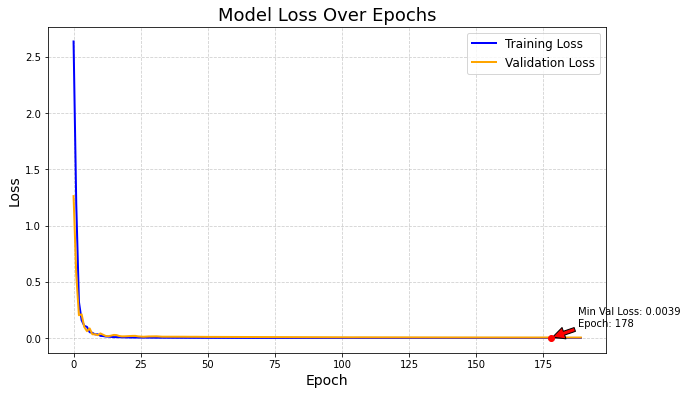

In [88]:
plt.figure(figsize=(10, 6))

# Plot training loss with a thinner line
plt.plot(history.history['loss'], label='Training Loss', color='blue', linestyle='-', linewidth=2)

# Plot validation loss with a thinner line
plt.plot(history.history['val_loss'], label='Validation Loss', color='orange', linestyle='-', linewidth=2)

# Title and labels
plt.title('Model Loss Over Epochs', fontsize=18)
plt.xlabel('Epoch', fontsize=14)
plt.ylabel('Loss', fontsize=14)

# Add grid
plt.grid(True, linestyle='--', alpha=0.6)

# Add legend in upper left
plt.legend(loc='upper right', fontsize='large')

# Add annotations
min_val_loss = min(history.history['val_loss'])
min_val_loss_epoch = history.history['val_loss'].index(min_val_loss) + 1
plt.annotate(f'Min Val Loss: {min_val_loss:.4f}\nEpoch: {min_val_loss_epoch}',
             xy=(min_val_loss_epoch, min_val_loss),
             xytext=(min_val_loss_epoch + 10, min_val_loss + 0.1),
             arrowprops=dict(facecolor='red', shrink=0.05),
             )

# Highlight the minimum point
plt.scatter(min_val_loss_epoch, min_val_loss, color='red', zorder=5)

# Show plot
plt.show()

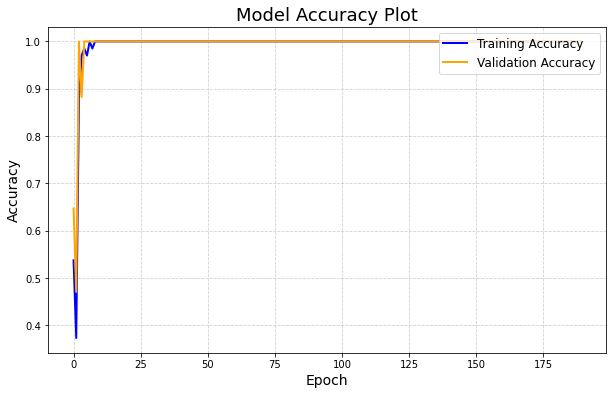

In [89]:

plt.figure(figsize=(10, 6))

# Plot training loss with a thinner line
plt.plot(history.history['binary_accuracy'], label='Training Accuracy', color='blue', linestyle='-', linewidth=2)

# Plot validation loss with a thinner line
plt.plot(history.history['val_binary_accuracy'], label='Validation Accuracy', color='orange', linestyle='-', linewidth=2)

# Title and labels
plt.title('Model Accuracy Plot', fontsize=18)
plt.xlabel('Epoch', fontsize=14)
plt.ylabel('Accuracy', fontsize=14)

# Add grid
plt.grid(True, linestyle='--', alpha=0.6)

# Add legend in upper left
plt.legend(loc='upper right', fontsize='large')

# Show plot
plt.show()

In [78]:
print(y_test.dtype)

int32


In [79]:
print(predictions.dtype)

float32


In [80]:
print("Min prediction:", predictions.min())
print("Max prediction:", predictions.max())

Min prediction: 6.2034458e-09
Max prediction: 0.9999918


In [81]:
print(predictions[:10])

[[3.5336801e-05]
 [9.9999011e-01]
 [9.9937809e-01]
 [2.9690801e-07]
 [2.2865967e-04]
 [2.5355741e-01]
 [1.0311556e-05]
 [9.9997026e-01]
 [1.3924257e-06]
 [9.9995017e-01]]


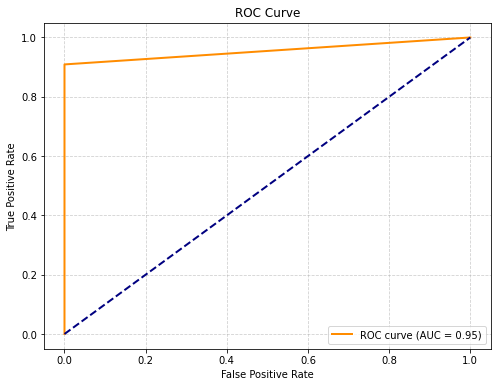

In [82]:
# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, binary_predictions)
roc_auc = auc(fpr, tpr)

# To Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
# Add grid
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend(loc='lower right')
plt.show()